In [2]:
import pandas as pd
import glob
import numpy as np
import json
import math
from natsort import natsorted

In [2]:
data = pd.read_json("/home/ravi/raviProject/DATA/Annotate/remaining_V6.json", orient='records')

In [3]:
data.shape

(2151110, 5)

In [4]:
data.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
0,1621531185,Coming to your city!! Pay attention. \n,1621532425,We Trump back right now,AnalyzingAmerica.json
1,1666120220,,1666121082,cool 😀,DonaldTrumpJr.json
2,1685195242,Major US Retailers Warn the Shoplifting Epidem...,1685199145,We in uk are encountering shoplifting on a gro...,TheTrumpRepublicans.json
3,1620231265,#AlexJonesShow LIVE: UN Announces Criminal Pl...,1620232443,Whoever talks about Covid-19 as a deadly disea...,InfoWars.json
4,1650756035,W o u l d y o u ?,1650807458,Hello guys,AnalyzingAmerica.json


In [5]:
df = data.copy()

In [6]:
# Assuming df is your DataFrame
shuffled_df = df.sample(frac=1, random_state=42)  # Shuffle the DataFrame

# Sample a fraction of the DataFrame
sampled_df = shuffled_df.sample(n=151110, replace=False, random_state=42)

In [7]:
sampled_df.shape

(151110, 5)

In [8]:
sampled_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
1836384,1628714797,👍👍👍\n,1628904286,Chuck should be done!,AnalyzingAmerica.json
68605,1683570125,Investigative journalist @jsolomonReports jo...,1683572466,Bouna serata da verona italia 🇮🇹🙋‍♂️🌹,DonaldTrumpJr.json
831851,1684855224,🔴 PAC Seeks To 'Draft' Tucker Carlson for 2024...,1684873409,Tucker is just the gatekeeper of pandoras box ...,ResisttheMainstream.json
1394318,1670278749,W h e n b a d t h i n g s h a p p e n ...,1670280083,I'm so happy,DonaldTrumpJr.json
1028190,1644850946,"'I, for one, will not be silenced. My family h...",1644852080,Agreed! I’m ready to take this to whatever lev...,TheTrumpRepublicans.json


In [9]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V7_151110.json', orient='records')

In [11]:
# sampled_df=pd.read_json('/home/ravi/raviProject/DATA/Annotate/sampled_V1.json', orient='records')
# # Save DataFrame as JSONL (JSON Lines)
# with open('/home/ravi/raviProject/DATA/Annotate/sampled_V1.jsonl', 'w') as f:
#     sampled_df.to_json(f, orient='records', lines=True)

In [10]:
remaining_df = shuffled_df.drop(sampled_df.index)

In [11]:
remaining_df.shape

(2000000, 5)

In [12]:
remaining_df.to_json('/home/ravi/raviProject/DATA/Annotate/remaining_V7_2M.json', orient='records')

In [13]:
remaining_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
1626048,1619101097,Trump was right!\n\n,1619101357,👍🏼,AnalyzingAmerica.json
852804,1694793681,☀️ Watch: Hundreds Baptized in Pond at Auburn ...,1694795420,Proud to see this come from my home state. ❤️❤️❤️,ResisttheMainstream.json
1585371,1691129131,Yes or no?,1691135245,Bearing false witness. Where have I heard that...,ResisttheMainstream.json
1884516,1669335266,A d h d m o m e n t,1669335694,"when will you get addy, btw? high time you did",LacansWhreHouse.json
1797186,1696197725,,1696198531,"If you workin' dat ass, that still counts as w...",AnticapitalistSurrealism.json


In [22]:
check1 = pd.read_json('/home/ravi/raviProject/DATA/Annotate/remaining_V7_2M.json', orient='records')

In [25]:
check1.groupby('telegramChannel')['msg'].nunique()

telegramChannel
AlexJones.json                    1597
AnalyzingAmerica.json             2639
AnticapitalistSurrealism.json    41151
BlackCrimesMatter.json             207
COVIDVACCINEVICTIMS.json          9936
DonaldTrumpJr.json                6336
FreedomFighters.json              6267
InfoWars.json                     3945
LacansWhreHouse.json             44907
PatriotStreetfighter.json        18971
PrayingMedic.json                11722
ResisttheMainstream.json         11645
RiotDogs.json                    55843
ThePatriotVoice.json             21938
TheTrumpRepublicans.json          9679
TrumpSupportersChannel.json       1940
UnitedAnarchists.json            40548
Name: msg, dtype: int64

In [36]:
check1.groupby('telegramChannel')['reply'].count()

telegramChannel
AlexJones.json                    11063
AnalyzingAmerica.json            300406
AnticapitalistSurrealism.json     84400
BlackCrimesMatter.json             1211
COVIDVACCINEVICTIMS.json          49342
DonaldTrumpJr.json               146081
FreedomFighters.json              15080
InfoWars.json                     17602
LacansWhreHouse.json              82923
PatriotStreetfighter.json        116114
PrayingMedic.json                 73388
ResisttheMainstream.json         482596
RiotDogs.json                     83182
ThePatriotVoice.json             166986
TheTrumpRepublicans.json         160603
TrumpSupportersChannel.json      149506
UnitedAnarchists.json             59517
Name: reply, dtype: int64

In [37]:
check1.groupby('telegramChannel')['reply'].count()

telegramChannel
AlexJones.json                    11063
AnalyzingAmerica.json            300406
AnticapitalistSurrealism.json     84400
BlackCrimesMatter.json             1211
COVIDVACCINEVICTIMS.json          49342
DonaldTrumpJr.json               146081
FreedomFighters.json              15080
InfoWars.json                     17602
LacansWhreHouse.json              82923
PatriotStreetfighter.json        116114
PrayingMedic.json                 73388
ResisttheMainstream.json         482596
RiotDogs.json                     83182
ThePatriotVoice.json             166986
TheTrumpRepublicans.json         160603
TrumpSupportersChannel.json      149506
UnitedAnarchists.json             59517
Name: reply, dtype: int64

11063

# sample ~100 per class wrt model predictions

In [14]:
df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV7/sampled_V7_151110_yPred_RoBERTa.json', orient='records')

In [15]:
df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred
0,1628714797,👍👍👍\n,1628904286,Chuck should be done!,AnalyzingAmerica.json,2


In [16]:
df['y_pred'].value_counts()

0    142423
2      5220
1      3467
Name: y_pred, dtype: int64

In [17]:
# Sample 100 rows with class 1
sample_class_1 = df[df['y_pred'] == 0].sample(n=4343, random_state=42)

# Sample 200 rows with class 2
sample_class_2 = df[df['y_pred'] == 1].sample(n=3467, random_state=42)

# Sample 400 rows with class 3
sample_class_3 = df[df['y_pred'] == 2].sample(n=5220, random_state=42)

# Concatenate the sampled dataframes
sampled_df = pd.concat([sample_class_1, sample_class_2, sample_class_3])

# Shuffle the dataframe
sampled_df = sampled_df.sample(frac=1, random_state=42)

# Drop the sampled rows from the original DataFrame to get the remaining rows
remaining_data = df.drop(sampled_df.index)

In [18]:
# Print the first few rows to verify
sampled_df.head()

,msgDate,msg,replyDate,text,telegramChannel,y_pred
116468,1696648832,What's your response to Hillary Clinton sugges...,1696684708,Hang the cunt,ResisttheMainstream.json,2
136983,1696303227,Should Kevin McCarthy be removed as speaker of...,1696333205,YES,ResisttheMainstream.json,0
74338,1667592137,🔴 Top Democrats 'Held Secret Meeting on Picki...,1667594010,Lol...cause she has been taken into custody fo...,ResisttheMainstream.json,1
23329,1669678504,Who are teachers unions really fighting for? A...,1669735686,DESMANTELEN EL SISTEMA EDUCATIVO MUNDIAL!!!! ...,DonaldTrumpJr.json,0
120652,1664512812,"And as usual, nobody will call him out on it.",1664550931,Class Action Lawsuit to spread his wealth acro...,ResisttheMainstream.json,1


In [19]:
len(sampled_df), len(remaining_data)

(13030, 138080)

In [20]:
remaining_data.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV7/sampled_V7_151110_yPred_RoBERTa_remaining138080.json', orient='records')
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV7/sampled_V7_151110_yPred_RoBERTa_Sampled13030WithYpred.json', orient='records')
sampled_df = sampled_df.drop(columns=['y_pred'])
sampled_df.to_csv('/home/ravi/raviProject/DATA/Annotate/LabelV7/sampled_V7_151110_yPred_RoBERTa_Sampled13030WithoutYpred.csv')

# Compare Labels

In [3]:
V7GPT=pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV7/sampled_V7_151110_yPred_RoBERTa_Sampled13030WithYpred.json', orient='records')

In [4]:
V7GPT.shape

(13030, 6)

In [5]:
V7GPT.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred
0,1696648832,What's your response to Hillary Clinton sugges...,1696684708,Hang the cunt,ResisttheMainstream.json,2


In [6]:
V7GPT.tail(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred
13029,1632967757,It’s only right.\n,1633061932,Sick of waiting for these evil corrupt politic...,AnalyzingAmerica.json,1


In [7]:
V7GPT['y_pred'].value_counts()

2    5220
0    4343
1    3467
Name: y_pred, dtype: int64

In [8]:
# Replace values in column 'FinalLabel'
replacement_dict = {0 : 1, 1 : 2, 2 : 3}
V7GPT['y_pred'] = V7GPT['y_pred'].replace(replacement_dict)

In [9]:
V7GPT['y_pred'].value_counts()

3    5220
1    4343
2    3467
Name: y_pred, dtype: int64

In [15]:
V7Ravi=pd.read_csv('/home/ravi/raviProject/DATA/Annotate/LabelV7/sampled_V7_151110_yPred_RoBERTa_Sampled13030WithoutYpred_LabelRavi.csv')

In [16]:
V7Ravi.shape

(13030, 7)

In [17]:
V7Ravi.head(1)

,Unnamed: 0,msgDate,msg,replyDate,text,telegramChannel,LabelRavi
0,116468,1696648832,What's your response to Hillary Clinton sugges...,1696684708,Hang the cunt,ResisttheMainstream.json,2.0


In [18]:
V7Ravi.tail(1)

,Unnamed: 0,msgDate,msg,replyDate,text,telegramChannel,LabelRavi
13029,22610,1632967757,It’s only right.\n,1633061932,Sick of waiting for these evil corrupt politic...,AnalyzingAmerica.json,NaN


In [19]:
V7Ravi['LabelRavi'].value_counts()

3.0    2607
2.0    2374
1.0    2221
Name: LabelRavi, dtype: int64

In [20]:
V7Labels=V7GPT.copy()
V7Labels['RLabel']=V7Ravi['LabelRavi']
V7Labels = V7Labels.dropna(subset=['RLabel'], axis=0)
V7Labels['RLabel']=V7Labels['RLabel'].astype('int64')

In [21]:
V7Labels.shape

(7202, 7)

In [22]:
V7Labels['RLabel'].value_counts()

3    2607
2    2374
1    2221
Name: RLabel, dtype: int64

In [23]:
V7Labels.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred,RLabel
0,1696648832,What's your response to Hillary Clinton sugges...,1696684708,Hang the cunt,ResisttheMainstream.json,3,2


In [91]:
V7Labels.to_csv('/home/ravi/raviProject/DATA/Annotate/LabelV7/sampled_V7_151110_yPred_RoBERTa_Sampled7202WithYprednRavi.csv')

In [92]:
V7Labels.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV7/sampled_V7_151110_yPred_RoBERTa_Sampled7202WithYprednRavi.json', orient='records')

## score

In [62]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, f1_score, accuracy_score


In [76]:
def sample_per_class(df, sample_count):
    sampled_df = pd.DataFrame()
    remaining_df = df.copy()

    # Iterate over unique classes
    for class_label in df['RLabel'].unique():
        # Extract 100 rows where the column value is the current class label
        sampled_class_df = remaining_df[remaining_df['RLabel'] == class_label]
        sampled_class_df = sampled_class_df.sample(frac=1, random_state=42)
        sampled_class_df = sampled_class_df.head(sample_count)

        # Append sampled rows to the sampled_df DataFrame
        sampled_df = pd.concat([sampled_df, sampled_class_df], ignore_index=True)

        # Remove the sampled rows from the remaining_df
        remaining_df = remaining_df.drop(sampled_class_df.index)

    return sampled_df, remaining_df

In [77]:
df = V7Labels.copy()
sampled_df, remaining_df = sample_per_class(df, 100)

In [78]:
len(df), len(sampled_df), len(remaining_df)

(7202, 300, 6902)

In [79]:
sampled_df['RLabel'].value_counts()

2    100
1    100
3    100
Name: RLabel, dtype: int64

In [80]:
remaining_df['RLabel'].value_counts()

3    2507
2    2274
1    2121
Name: RLabel, dtype: int64

In [81]:
remaining_df.shape[0]

6902

In [82]:
sampled_df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred,RLabel
0,1699107164,🔴 Family of Hockey Star Killed Mid-Game Breaks...,1699195203,That karate kick to the neck was intentional. ...,ResisttheMainstream.json,2,2


In [83]:
kappa = cohen_kappa_score(sampled_df['RLabel'], sampled_df['y_pred'])

In [84]:
kappa

0.73

In [85]:
weighted_f1 = f1_score(sampled_df['RLabel'], sampled_df['y_pred'], average='weighted')

In [86]:
weighted_f1

0.8064371246835365

In [87]:
acc = accuracy_score(sampled_df['RLabel'], sampled_df['y_pred'])

In [88]:
acc

0.82

In [89]:
# Generate classification report
class_report = classification_report(sampled_df['RLabel'], sampled_df['y_pred'])

In [59]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.53      0.68       100
           2       0.83      0.97      0.89       100
           3       0.76      0.96      0.85       100

    accuracy                           0.82       300
   macro avg       0.84      0.82      0.81       300
weighted avg       0.84      0.82      0.81       300



In [60]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

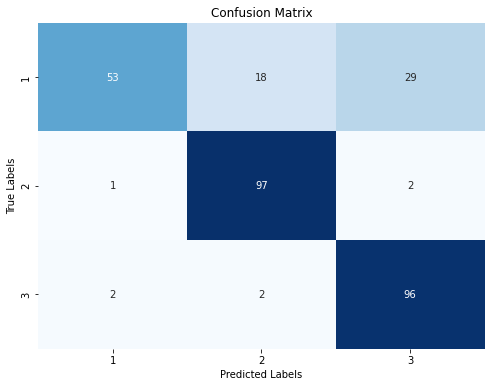

In [61]:
conf_matrix=confusion_matrix(sampled_df['RLabel'], sampled_df['y_pred'])
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set the tick labels to match your class labels (1, 2, 3)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=[1, 2, 3])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=[1, 2, 3])

plt.show()

In [90]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV7/V7_Labeled_300_sampled.json', orient='records')
remaining_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV7/V7_Labeled_6902_remaining.json', orient='records')

# MERGE with previous labeled set

### combine all - full labeled set

In [93]:
V1Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV1/sampled_V1_10K_Experts_Sampled487WithMattnRavi.json', orient='records')
V2Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV2/sampled_V2_10K_yPred_RoBERTa_Sampled1457WithYprednRavi.json', orient='records')
V3Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV3/sampled_V3_10K_yPred_RoBERTa_Sampled1404WithYprednRavi.json', orient='records')
V4Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV4/sampled_V4_10K_yPred_RoBERTa_Sampled1044WithYprednRavi.json', orient='records')
V5Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV5/sampled_V5_10K_yPred_RoBERTa_Sampled853WithYprednRavi.json', orient='records')
V6Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_Sampled5676WithYprednRavi.json', orient='records')
V7Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV7/sampled_V7_151110_yPred_RoBERTa_Sampled7202WithYprednRavi.json', orient='records')

In [94]:
V1Labels.head(1)

,Unnamed: 0,id,text,msg,msgDate,replyDate,comparison_MJ,telegramChannel,label,LabelM,LabelR,Agree?,FinalLabel
0,3,41,She needs to strike that big fat mouth,This would be another win for Republicans.\n,1651779040,1651806800,True,AnalyzingAmerica.json,['No threat / Ambiguous'],3,3,Equal,1


In [95]:
V2Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V3Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V4Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V5Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V6Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V7Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)

In [96]:
print(V1Labels.shape, '\n', V1Labels['FinalLabel'].value_counts())
print(V2Labels.shape, '\n', V2Labels['FinalLabel'].value_counts())
print(V3Labels.shape, '\n', V3Labels['FinalLabel'].value_counts())
print(V4Labels.shape, '\n', V4Labels['FinalLabel'].value_counts())
print(V5Labels.shape, '\n', V5Labels['FinalLabel'].value_counts())
print(V6Labels.shape, '\n', V6Labels['FinalLabel'].value_counts())
print(V7Labels.shape, '\n', V6Labels['FinalLabel'].value_counts())

(487, 13) 
 1    207
3    171
2    109
Name: FinalLabel, dtype: int64
(1457, 7) 
 1    1185
2     152
3     120
Name: FinalLabel, dtype: int64
(1404, 7) 
 1    1094
3     176
2     134
Name: FinalLabel, dtype: int64
(1044, 7) 
 1    746
3    162
2    136
Name: FinalLabel, dtype: int64
(853, 9) 
 1    505
3    190
2    158
Name: FinalLabel, dtype: int64
(5676, 10) 
 1    2114
3    1967
2    1595
Name: FinalLabel, dtype: int64
(7202, 7) 
 1    2114
3    1967
2    1595
Name: FinalLabel, dtype: int64


In [97]:
selected_cols =['msgDate', 'msg', 'replyDate', 'text', 'telegramChannel', 'FinalLabel']
merged_df = pd.concat([V1Labels[selected_cols], V2Labels[selected_cols], 
                       V3Labels[selected_cols], V4Labels[selected_cols],
                       V5Labels[selected_cols], V6Labels[selected_cols],
                       V7Labels[selected_cols]], ignore_index=True)

In [98]:
# Replace values in column 'FinalLabel'
replacement_dict = {1 : 0, 2 : 1, 3 : 2}
merged_df['FinalLabel'] = merged_df['FinalLabel'].replace(replacement_dict)

In [101]:
merged_df.shape

(18123, 6)

In [102]:
merged_df['FinalLabel'].value_counts()

0    8072
2    5393
1    4658
Name: FinalLabel, dtype: int64

In [103]:
shuffled_df = merged_df.sample(frac=1, random_state=42)  # Shuffle the DataFrame

In [104]:
shuffled_df.head()

,msgDate,msg,replyDate,text,telegramChannel,FinalLabel
10132,1631828363,Is the Democratic Party a cult?\n,1631831072,When is this heartless bitch going to die?,AnalyzingAmerica.json,2
17886,1624809381,Trump Slams “Woke” General’s Defense Of Critic...,1624817257,Disgusting to see Marxist infiltrating our mil...,TheTrumpRepublicans.json,2
12362,1627634321,Hello Patriot Streetfighters!!\n\nScott here p...,1627682809,Oh my gosh I’m so sorry to hear about the gene...,PatriotStreetfighter.json,0
11880,1665861934,🔴 Barack Obama Jumps Into Midterm Battle. Her...,1665864900,No ones listening Parasite. You going to JAIL ...,ResisttheMainstream.json,1
2157,1618852647,Waters has to face the music.\n\n,1618863650,Impeach her!,AnalyzingAmerica.json,1


In [105]:
shuffled_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter7_Labeled_18123_sampled_ALL.json', orient='records')

## make new iter7 labeled data

In [106]:
df5 = pd.read_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter7_Labeled_18123_sampled_ALL.json', orient='records')

In [107]:
df5['FinalLabel'].value_counts()

0    8072
2    5393
1    4658
Name: FinalLabel, dtype: int64

In [108]:
# Sample 100 rows with class 1
sample_class_1 = df5[df5['FinalLabel'] == 0].sample(n=5026, random_state=42)

# Sample 200 rows with class 2
sample_class_2 = df5[df5['FinalLabel'] == 1].sample(n=4658, random_state=42)

# Sample 400 rows with class 3
sample_class_3 = df5[df5['FinalLabel'] == 2].sample(n=5393, random_state=42)

# Concatenate the sampled dataframes
sampled_df = pd.concat([sample_class_1, sample_class_2, sample_class_3])

# Shuffle the dataframe
sampled_df = sampled_df.sample(frac=1, random_state=42)

# Drop the sampled rows from the original DataFrame to get the remaining rows
remaining_data = df5.drop(sampled_df.index)

In [109]:
len(sampled_df), len(remaining_data)

(15077, 3046)

In [1]:
sampled_df['FinalLabel'].value_counts()

NameError: name 'sampled_df' is not defined

In [110]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV7/V7_ALLLabeled_15077_sampled.json', orient='records')
remaining_data.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV7/V7_ALLLabeled_3046_remaining.json', orient='records')

In [111]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter7_Labeled_15077_sampled_forNextIter.json', orient='records')